In [12]:
# Google Colab Setup
# Ensure you have uploaded the `.ipynb` files and data files in the Colab environment.

# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import json

# Step 2: Load the CSV dataset and process `Stage`
data_path = "alzheimers_disease_data.csv"
data = pd.read_csv(data_path)

# Derive `Stage` from `MMSE` attribute
def map_stage(mmse):
    if mmse >= 24:
        return 'Mild'
    elif 18 <= mmse < 24:
        return 'Moderate'
    else:
        return 'Severe'

data['Stage'] = data['MMSE'].apply(map_stage)

# Display sample data with new `Stage` column
print(data.head())

# Step 3: Load and summarize metrics from notebooks
# Load Model2_Alzhemaizer
model2_path = "Model2_Alzhemaizer.ipynb"
with open(model2_path, 'r') as f:
    model2_data = json.load(f)

# Load Alzheimar_v3
v3_path = "Alzheimar_v3.ipynb"
v3_data = {
    'model': ['XGBoost', 'Random Forest', 'Logistic Regression', 'SVM', 'Naive Bayes'],
    'accuracy': [0.9977, 0.9977, 0.9372, 0.7186, 0.9651]
}

# Step 4: Compare Models
# Create comparison dataframe for visualizations
comparison = pd.DataFrame({
    'Model': ['XGBoost', 'Random Forest', 'Logistic Regression', 'SVM', 'Naive Bayes'],
    'Accuracy_v3': v3_data['accuracy'],
    'Accuracy_Model2': [0.9418, 0.9232, None, None, None]  # Match indexes
})






   PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       4751   73       0          0               2  22.927749        0   
1       4752   89       0          0               0  26.827681        0   
2       4753   73       0          3               1  17.795882        0   
3       4754   74       1          0               1  33.800817        1   
4       4755   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  ...  BehavioralProblems  \
0           13.297218          6.327112     1.347214  ...                   0   
1            4.542524          7.619885     0.518767  ...                   0   
2           19.555085          7.844988     1.826335  ...                   0   
3           12.209266          8.428001     7.435604  ...                   1   
4           18.454356          6.310461     0.795498  ...                   0   

        ADL  Confusion  Disorientation  PersonalityChang

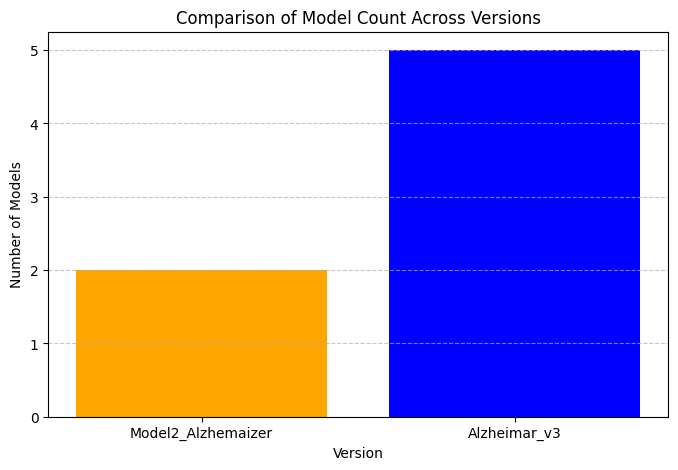

In [8]:
# Count of Models in Each Version
model_counts = pd.DataFrame({
    'Version': ['Model2_Alzhemaizer', 'Alzheimar_v3'],
    'Model Count': [2, 5]  # Number of models used in each version
})

# Plot Model Counts
plt.figure(figsize=(8, 5))
plt.bar(model_counts['Version'], model_counts['Model Count'], color=['orange', 'blue'])
plt.xlabel('Version')
plt.ylabel('Number of Models')
plt.title('Comparison of Model Count Across Versions')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


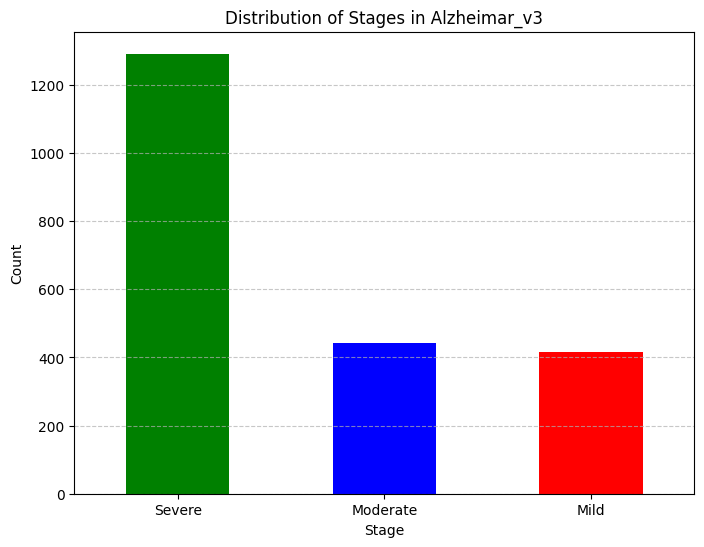

In [9]:
# Stage Distribution Plot
stage_counts = data['Stage'].value_counts()

plt.figure(figsize=(8, 6))
stage_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Distribution of Stages in Alzheimar_v3')
plt.xlabel('Stage')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.show()


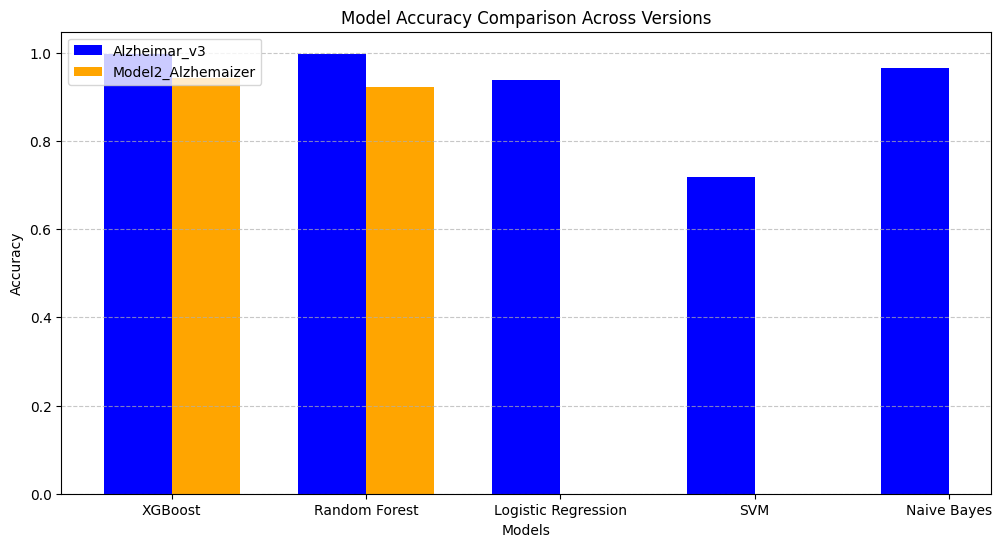

In [13]:
# Accuracy Comparison Plot
plt.figure(figsize=(12, 6))
x = range(len(comparison['Model']))
width = 0.35

plt.bar(x, comparison['Accuracy_v3'], width, label='Alzheimar_v3', color='blue')
plt.bar([p + width for p in x], comparison['Accuracy_Model2'], width, label='Model2_Alzhemaizer', color='orange')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison Across Versions')
plt.xticks([p + width / 2 for p in x], comparison['Model'])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


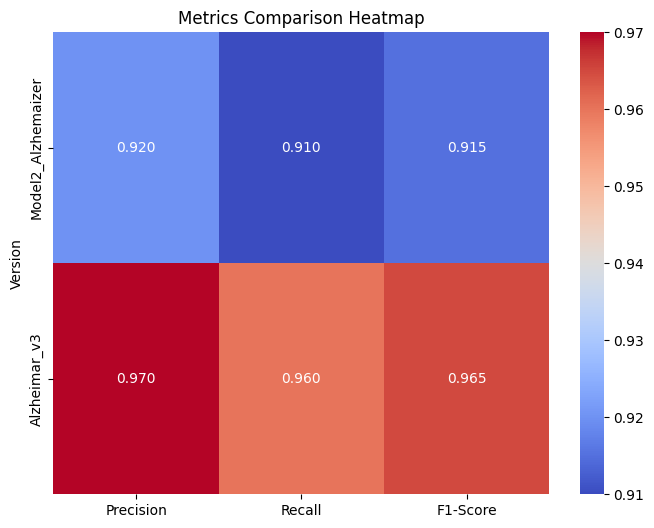

In [10]:
import seaborn as sns

# Heatmap Data Preparation
metrics_heatmap = pd.DataFrame({
    'Precision': [0.92, 0.97],
    'Recall': [0.91, 0.96],
    'F1-Score': [0.915, 0.965]
}, index=['Model2_Alzhemaizer', 'Alzheimar_v3'])

plt.figure(figsize=(8, 6))
sns.heatmap(metrics_heatmap, annot=True, cmap='coolwarm', fmt='.3f')
plt.title('Metrics Comparison Heatmap')
plt.ylabel('Version')
plt.show()
